In [1]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [2]:
%pwd
%cd ir_data/GL-06-56-4

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-56-4


### Load Raw Data

<AxesSubplot:xlabel='Relative Time'>

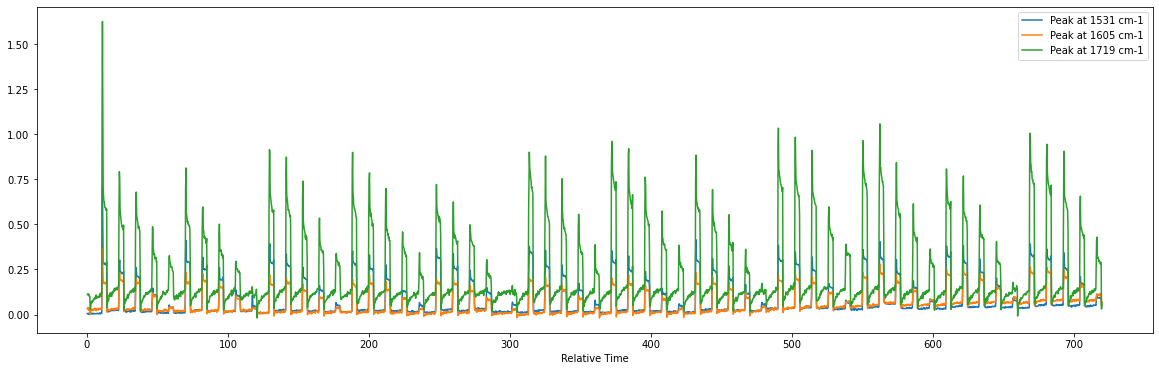

In [27]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [28]:
# List all the wavelengths observed
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1531 cm-1', 'Peak at 1605 cm-1', 'Peak at 1719 cm-1']


In [29]:
# Choose peak
peak_of_interest = 'Peak at 1531 cm-1'

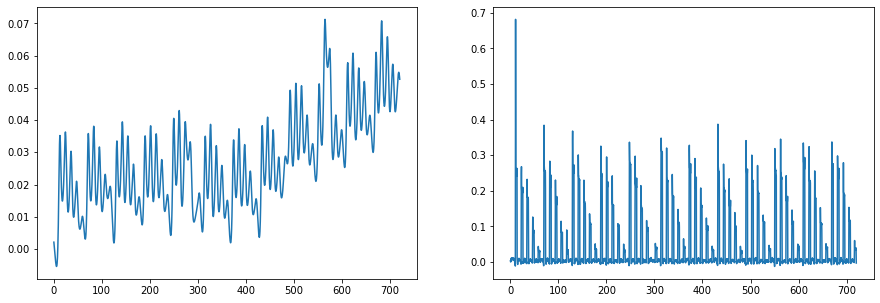

In [30]:
# Correct Baseline (needed if using area data)
correction = Data.baseline_correction(ir_data[peak_of_interest], peak_of_interest)
ir_data[peak_of_interest] = ir_data[peak_of_interest] - correction

# Plot it to see
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(ir_data['Relative Time'], correction)
ax2.plot(ir_data['Relative Time'], ir_data[peak_of_interest])

In [31]:
# Instantiate class
peaks = Peaks(ir_data)

# Auto find prominence and height to match number of conditions
prominence, no_reactions, points_per_reaction = peaks.auto_prom(peak_of_interest)
height = peaks.auto_height(peak_of_interest)
residence_time = peaks.auto_area(peak_of_interest, prominence, no_reactions, points_per_reaction)

print('There are', no_reactions, 'reactions with', points_per_reaction, 'points per reaction')
print('Prominence threshold =', np.round(prominence, 4))
print('Height threshold =', np.round(height, 4))
print('Residence time =', np.round(residence_time, 2))

There are 12 reactions with 5 points per reaction
Prominence threshold = 0.0354
Height threshold = 0.2383
Residence time = 3.82


In [32]:
# Set some variables
time_adjust_before = 0
time_adjust_after = 2

# For loop to see all areas
# for var in range(0, no_reactions * points_per_reaction):
#     peaks.exp_area_sp(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after, var)
#     print(var)

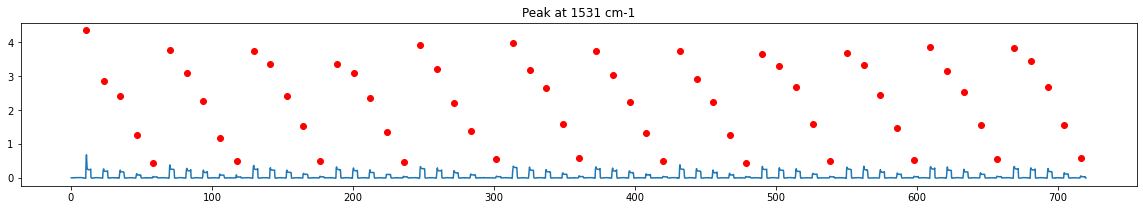

In [33]:
## EXP AREA: Determine the experimental areas of a single wavelength
processed_ir_data = peaks.exp_area(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after)

## Visualise which peaks have been picked - single peak
peaks.plot(processed_ir_data, peak_of_interest)

### Smooth the data

In [36]:
rxn = processed_ir_data[['Relative Time','Peak Property']]

df = []

for var in range(0, no_reactions):
    # Find the t0 point
    t0_list = rxn.iloc[var*points_per_reaction,1]
    df.append(t0_list)

In [49]:
df

[4.355319117605029,
 3.772855994744778,
 3.733901924799693,
 3.370400904572241,
 3.920099435746958,
 3.968741303171216,
 3.7264565662628466,
 3.735879360067983,
 3.666098664705211,
 3.6681739834461333,
 3.863494469502654,
 3.843033427107291]

In [50]:
np.mean(df)

3.802037929311003

In [51]:
np.std(df)

0.22203590261110712

In [52]:
df_no_outliers = [x for x in df if (x > np.mean(df) - np.std(df))]
df_no_outliers = [x for x in df_no_outliers if (x < np.mean(df) + np.std(df))]
df_no_outliers

[3.772855994744778,
 3.733901924799693,
 3.920099435746958,
 3.968741303171216,
 3.7264565662628466,
 3.735879360067983,
 3.666098664705211,
 3.6681739834461333,
 3.863494469502654,
 3.843033427107291]

In [53]:
len(df)

12

In [54]:
len(thing)

10

In [ ]:
# Original in function
		# Find the average of the t0s
		df =[]
		for var in range(0, no_reactions):
			# Find the t0 point
			t0_list = rxn.iloc[var * points_per_reaction, 1]
			df.append(t0_list)
			average_t0 = sum(df)/len(df)
            
        # Replace original t0s with the average
		for var in range(0,no_reactions):
			processed_ir_data.iloc[var * points_per_reaction, 1] = average_t0
			
		return processed_ir_data

#### Average t0s

In [10]:
processed_ir_data = peaks.t0_correction(processed_ir_data, no_reactions, points_per_reaction)

#### Apply linear smoothing

In [11]:
processed_ir_data = peaks.linear_correction(processed_ir_data, no_reactions, points_per_reaction)

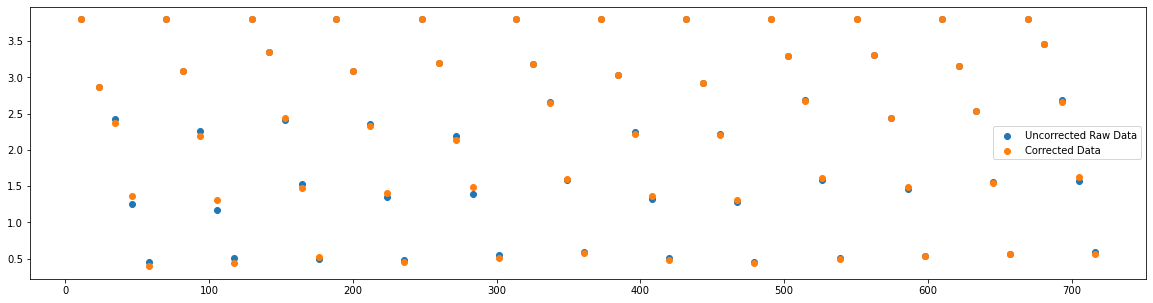

In [12]:
plt.figure(figsize=(20,5))
plt.scatter(processed_ir_data['Relative Time'], processed_ir_data['Raw Peak Property'], label = 'Uncorrected Raw Data')
plt.scatter(processed_ir_data['Relative Time'], processed_ir_data['Peak Property'], label = 'Corrected Data')
plt.legend()
plt.show()

# Read experimental conditions and add to dataframe

In [13]:
Conditions()
experimental_data = Conditions.read(processed_ir_data)
#experimental_data

Inputs seem good: IR Datapoints =  60 , Number of conditions =  60


### Create the SPKA profiles

In [23]:
spka = SPKA(experimental_data)

In [24]:
# Use the existing spka function to create the profiles
spka_data = spka.spka('[A]0')

In [25]:
spka_data

,Experiment,A,B,C,[A]0,[B]0,[C]0,Initial Conv,Interval Size,tR (min),SPKA,Relative Time,Peak Property,Method,Raw Peak Property,SPKA Conversion,SPKA Ideal t0 Concentration,Normalised IR Concentration,Rate,[A]
0,Exp1 - R1,A2,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,23.183333,2.865197,experimental area,2.865197,1,0.1,0.075360,0.00216145,0.0876798
1,Exp1 - R1,A2,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,20,34.933333,2.369671,experimental area,2.426410,0.8,0.08,0.062326,0.00155032,0.0711632
2,Exp1 - R1,A2,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,50,46.683333,1.370594,experimental area,1.255882,0.5,0.05,0.036049,0.00122378,0.0430245
3,Exp1 - R1,A2,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,80,58.183333,0.392774,experimental area,0.450746,0.2,0.02,0.010331,0.000848192,0.0151653
4,Exp1 - R2,A2,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,0,82.183333,3.083494,experimental area,3.083494,1,0.1,0.081101,0.0016578,0.0905505
5,Exp1 - R2,A2,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,20,93.933333,2.192923,experimental area,2.267987,0.8,0.08,0.057678,0.00195811,0.0688388
6,Exp1 - R2,A2,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,50,105.683333,1.314856,experimental area,1.164729,0.5,0.05,0.034583,0.00135237,0.0422915
7,Exp1 - R2,A2,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,80,117.433333,0.436789,experimental area,0.511853,0.2,0.02,0.011488,0.000746642,0.0157441
8,Exp1 - R3,A2,B1,C1,0.1,0.15,0.01,20.0,30.0,11.4,0,141.433333,3.354795,experimental area,3.354795,1,0.1,0.088237,0.00103186,0.0941184
9,Exp1 - R3,A2,B1,C1,0.1,0.15,0.01,20.0,30.0,11.4,20,153.183333,2.434273,experimental area,2.407259,0.8,0.08,0.064025,0.00140127,0.0720127


# def spka_best_fit()

Function to create SPKA profiles, then best fit the data for further use

In [22]:
# This is in init, can remove
reaction_list = experimental_data['Experiment'].unique()

def spka_best_fit():
    df_old_rate = []
    df_old_A = []
    df_new_rate = []
    df_new_A = []

    for reaction in reaction_list:

        tmp = spka_data.loc[spka_data['Experiment'] == reaction]

        # Find best fit line of Rate vs [A]
        a, b = np.polyfit(tmp['[A]'].astype(float), tmp['Rate'].astype(float), 1)

        # Find max and min concentrations
        max_A = tmp['[A]'].max()
        min_A = tmp['[A]'].min()

        # Build a ten point line between these points
        best_fit_line_x = np.linspace(max_A, min_A, 4)

        # Use a and b to find the corresponding y points
        best_fit_line_y = a * best_fit_line_x + b

        # Backup then replace the original data
        df_old_rate.append(tmp['Rate'])
        df_old_A.append(tmp['[A]'])
        df_new_rate.append(pd.Series(best_fit_line_y))
        df_new_A.append(pd.Series(best_fit_line_x))

    spka_data['Raw Rate'] = pd.concat(df_old_rate, ignore_index = True)
    spka_data['Raw [A]'] = pd.concat(df_old_A, ignore_index = True)
    spka_data['Rate'] = pd.concat(df_new_rate, ignore_index = True)
    spka_data['[A]'] = pd.concat(df_new_A, ignore_index = True)

    return spka_data

In [26]:
spka_data = spka_best_fit(spka_data)
spka_data

,Experiment,A,B,C,[A]0,[B]0,[C]0,Initial Conv,Interval Size,tR (min),...,Peak Property,Method,Raw Peak Property,SPKA Conversion,SPKA Ideal t0 Concentration,Normalised IR Concentration,Rate,[A],Raw Rate,Raw [A]
0,Exp1 - R1,A2,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,...,2.865197,experimental area,2.865197,1,0.1,0.075360,0.002009,0.087680,0.00216145,0.0876798
1,Exp1 - R1,A2,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,...,2.369671,experimental area,2.426410,0.8,0.08,0.062326,0.001602,0.063508,0.00155032,0.0711632
2,Exp1 - R1,A2,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,...,1.370594,experimental area,1.255882,0.5,0.05,0.036049,0.001194,0.039337,0.00122378,0.0430245
3,Exp1 - R1,A2,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,...,0.392774,experimental area,0.450746,0.2,0.02,0.010331,0.000787,0.015165,0.000848192,0.0151653
4,Exp1 - R2,A2,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,...,3.083494,experimental area,3.083494,1,0.1,0.081101,0.001924,0.090551,0.0016578,0.0905505
5,Exp1 - R2,A2,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,...,2.192923,experimental area,2.267987,0.8,0.08,0.057678,0.001583,0.065615,0.00195811,0.0688388
6,Exp1 - R2,A2,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,...,1.314856,experimental area,1.164729,0.5,0.05,0.034583,0.001241,0.040680,0.00135237,0.0422915
7,Exp1 - R2,A2,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,...,0.436789,experimental area,0.511853,0.2,0.02,0.011488,0.000900,0.015744,0.000746642,0.0157441
8,Exp1 - R3,A2,B1,C1,0.1,0.15,0.01,20.0,30.0,11.4,...,3.354795,experimental area,3.354795,1,0.1,0.088237,0.001271,0.094118,0.00103186,0.0941184
9,Exp1 - R3,A2,B1,C1,0.1,0.15,0.01,20.0,30.0,11.4,...,2.434273,experimental area,2.407259,0.8,0.08,0.064025,0.001079,0.068345,0.00140127,0.0720127


### Perform RPKA

In [18]:
rpka = RPKA(spka_data, points_per_reaction)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


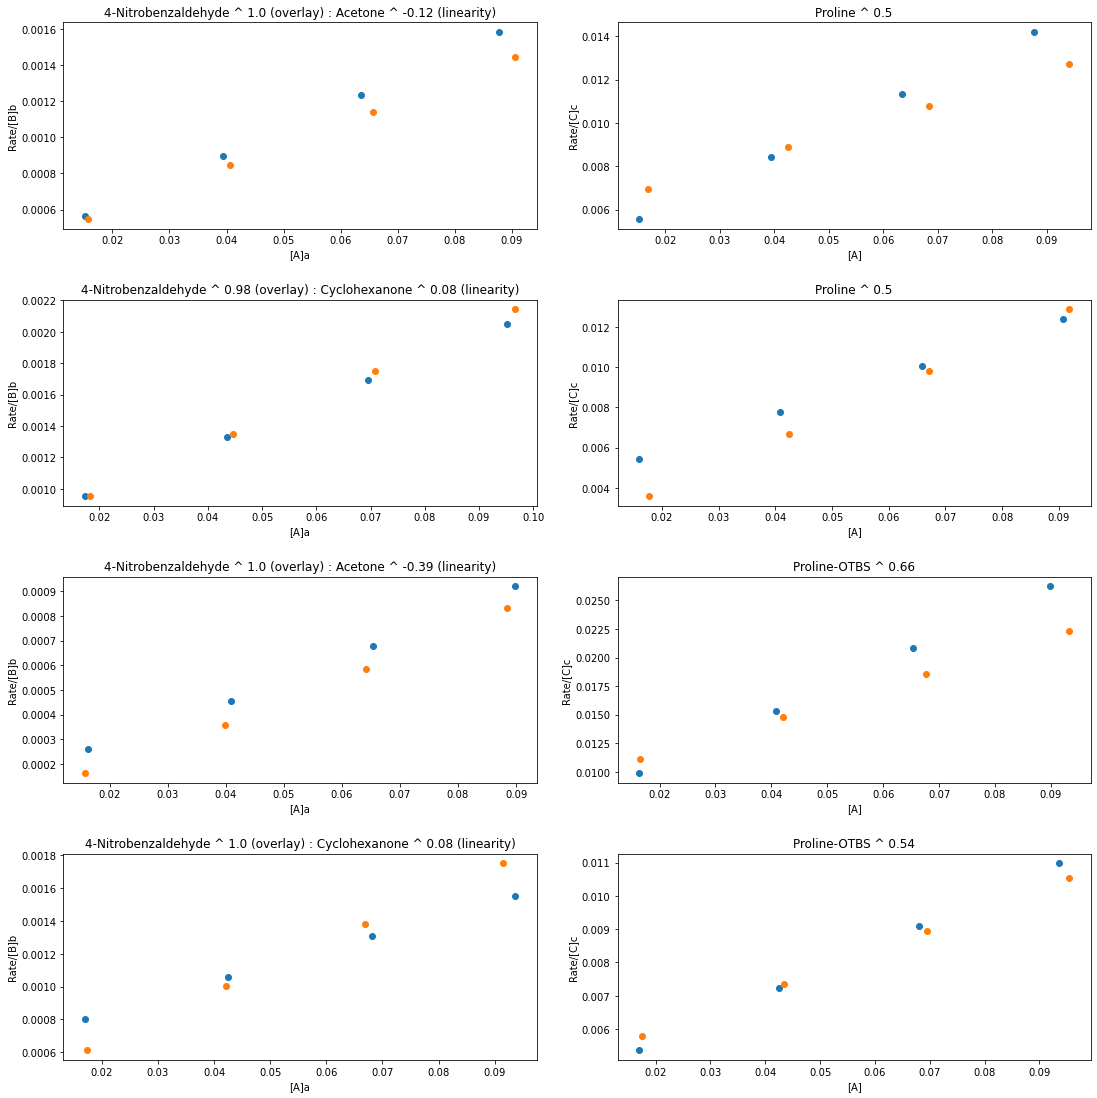

In [19]:
rpka_results = rpka.diff_excess('TNC')
rpka.check_results(rpka_results)
#rpka_results

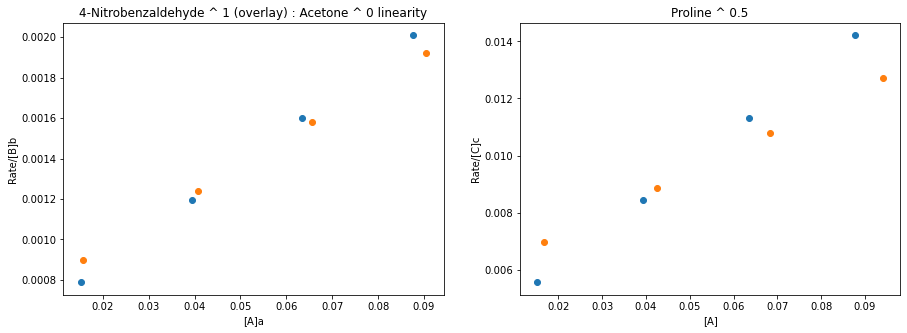

In [20]:
rpka.manual(0, 1, 0, 0.5)

In [21]:
# Set up excelwriter
writer = pd.ExcelWriter(ir_data['Exp No'][0] + ' - ' +   # Adds experiment title - name of txt file
                        peak_of_interest[8:12] + ' - ' + # Adds the peak
                        processed_ir_data['Method'][0] + # Adds the methods used (prominence, area, etc)
                        '.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
rpka_results.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
#writer.save()

# This won't work if the excel file is open